# Your name: Max Kaiser

## Assignment Name: CA03 - Decision Tree Algorithm  



# Program Inititialization Section
## Enter your import packages here

In [ ]:
# import packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn import metrics #multilabel classification, computes subset accuracy and other scores 

# packages to vizualize Decision Tree 
import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# **1. Data Source and Contents**



# Data File Reading Section
## Write code to read in data from external sources here

In [ ]:
#read datasets

from google.colab import files
uploaded = files.upload()

#run the code and choose census_data.csv file from your local computer 

Saving census_data.csv to census_data.csv


In [ ]:
census_data = pd.read_csv('census_data.csv')

# **2. Data Quality Analysis**

Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.



**Q.1.1 Why does it makes sense to discretize columns for this problem?**
**Q.1.2 What might be the issues (if any) if we DID NOT discretize the      columns.**


It makes sense to discretize columns (numerical values --> discrete categories ) for this problem because some columns like e.g. age contain too many values so that the algorithm struggles to identify meaningful/intersting patterns in the data. 

Putting the values in ordered and discrete buckets/bins helps the algorithm to deal with outliers,skewness and to decrease entropy (degree of information disorder) -- observations in bins are more similar. 



In [ ]:
# 1. Statistical Description of data (data.describe)

census_data.dtypes

census_data.describe(include=['object'])
# only y column is numeric 
# that's why include 'object' parameter to get descriptives for each column 
# all other columns are objects 
#unique column gives me the number of bins 

hours_per_week_bin occupation_bin  ...   age_bin   flag
count               48842          48842  ...     48842  48842
unique                  5              5  ...         5      2
top              b. 31-40   c. Mid - Mid  ...  e. 40-55  train
freq                26639          13971  ...     13963  32561

[4 rows x 10 columns]

In [ ]:
# 2. Display number of total rows and columns of the dataset (data.shape)
census_data.shape
#48842 rows 
#11 columns 

(48842, 11)

In [ ]:
# 3. Display number of non-null values for each column (data.count)
census_data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
# 4. Display number of null values for each column (sum of data.isnull)

census_data.isnull().sum()

#no null values 

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
# 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)

In [ ]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
# 6. Display Top 10 and Bottom 10 records (head and tail)

census_data.head(10)

census_data.tail(10)

In [ ]:
#Additional exploratory analysis 

#Question: How many hours do most people work/per week?


census_data.hours_per_week_bin.value_counts().sort_index

#Most people work 31-40 hours/week 

<bound method Series.sort_index of b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64>

In [ ]:
#Question: 

#What's the number of people earning more or less(equal) to 50k salary?

census_data.y.value_counts().sort_index

#mor people make <= 50k salary 

<bound method Series.sort_index of 0    37155
1    11687
Name: y, dtype: int64>

In [ ]:
census_data.flag.value_counts().sort_index

#train data 32561 observations 
#test data 16281 observations

<bound method Series.sort_index of train    32561
test     16281
Name: flag, dtype: int64>

## Cleansing the dataset
### Dropping of less valued columns:
1. education_num_bin does not add much value to the dataset in terms of information. The education bin labels the same information in a more readable way.Therefore, we can drop this column.

In [ ]:
# Cleaning up the data

#dropping column that is not required
census_data.drop('education_num_bin',axis=1,inplace=True)

#checking if dropped (displaying final columns)
census_data.columns 

In [ ]:
#EXTRA

#Change msr_bin (Relationship and Marriage Status)

#changes = {"High":"married","Mid":"relationship","Low":"single"}

# census_data.msr_bin = census_data.msr_bin.replace(changes)

# not working --> revisit later 

#**3. Exploratory Data Analysis (EDA) 7 explanatory variables**

1. *Age (bins)*


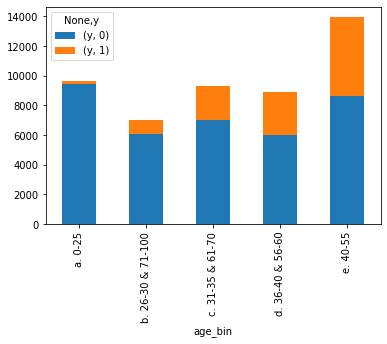

In [ ]:
# 1 Age (5 bins) Stacked bar graph (pivot table)

age_bar = census_data.pivot_table(index= 'age_bin', columns ='y', aggfunc ={'y':'size'})


ax = age_bar.plot.bar(stacked=True) #plotting the graph 


# not exactly what I want through
# I want the y axis to represent 0-100% of the total for that age bin, split by y=0 and y=1 
#set ylim to (0-100)?

# is there a different aggfunc I can pass ?

#margins?

#age_dist = census_data.groupby('age_bin').y.value_counts().sort_index()

#or 

# census_data.groupby(['age_bin','y']).y.agg('size').round(1)

#age_dist

#Python documentation: 

#marginsbool, default False
#Add all row / columns (e.g. for subtotal / grand totals).

#brainstorming logic 
#census_date (y=0) / (census_data y=0 & y=1) *100

#census_date (y=1) / (census_data y=0 & y=1) *100


#Adding columntotal --> but I want row total 
#columntotal = age_pivot.sum()
#columntotal.name = 'rowtotal'
#age_pivot.append(columntotal)


# Analysis: 

# The older people get the more the ratio shifts towards earning a higher salary. 


*2. Capital Gain /Loss (3 bins)*

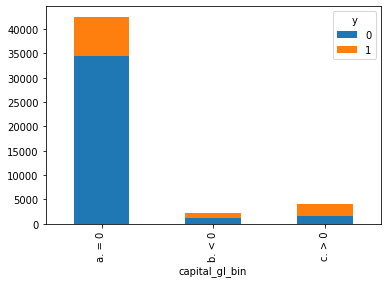

In [ ]:
capital_bar = census_data.pivot_table(index= 'capital_gl_bin', columns ='y', aggfunc ='size').plot.bar(stacked=True)


# Analysis 

# I guess c.> 0 (bin) means capital gains --> 
# so people that collected capital gains are more likely to have higher income than people who occured losses or break-even on their investments. 

*3. Education (5 bins)*



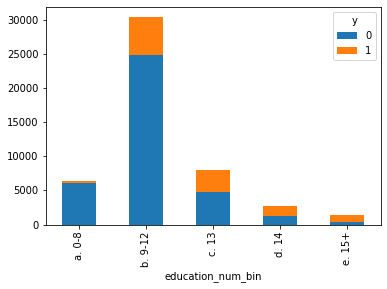

In [ ]:
education_bar = census_data.pivot_table(index= 'education_num_bin', columns ='y', aggfunc ='size').plot.bar(stacked=True)

#Analysis 

#more educatio  translates in higher likelyhood of earning more money 

*4. Hours per Week (5 bins)*

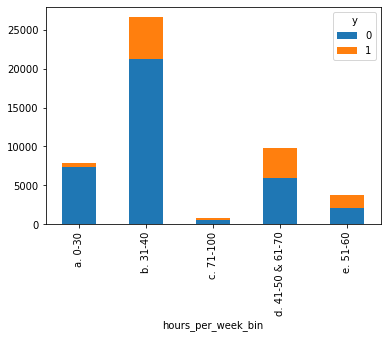

In [ ]:
hours_per_week_bar = census_data.pivot_table(index= 'hours_per_week_bin', columns ='y', aggfunc ='size').plot.bar(stacked=True)

#Analysis insight 

#the less hours you work --> the less likely you make 50k 

*5. Marriage Status and Relationship (3 bins)*

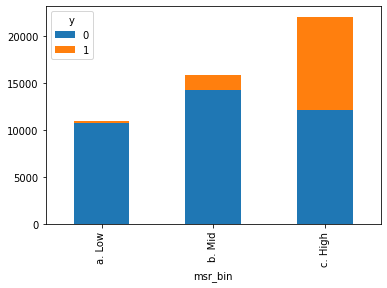

In [ ]:
relationship_bar = census_data.pivot_table(index= 'msr_bin', columns ='y', aggfunc ='size').plot.bar(stacked=True)

# the bin names are kinda confusing for marriage status (relationship)
# Would recommend to change low, mid and high for something more descriptive
# married, single ... and not sure what the third one could be



#Analysis: 

# People with a 'high' relationship/marriage status make proportionally more than people classified as low and mid. 
# Relationship status has a huge impact on whether or not you make 50k a year. 




*6. Occupation  (5 bins)*

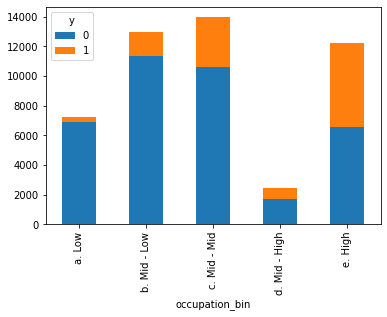

In [ ]:
occup_bar = census_data.pivot_table(index= 'occupation_bin', columns ='y', aggfunc ='size').plot.bar(stacked=True)

#Analysis

#Seems like people with high occupation tend to earn more money. 

*7. Race and Sex (3 bins)*

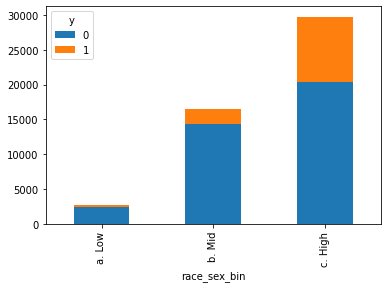

In [ ]:
race_sex_bar = census_data.pivot_table(index= 'race_sex_bin', columns ='y', aggfunc ='size').plot.bar(stacked=True)


# also low, mid, and high not very descriptive 

###**4. Build Decision Tree Classifier Models:**

**Definition:** Given a data of attributes together with its classes, a decision tree
produces a sequence of rules that can be used to classify the data.

**Advantages:** Decision Tree is simple to understand and visualise, requires little data
preparation, and can handle both numerical and categorical data.

**Disadvantages:** Decision tree can create complex trees that do not generalize well,
and decision trees can be unstable because small variations in the data might result in
a completely different tree being generated.



In [ ]:
#define columns you want to change to category and store as variable
columns = ['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','workclass_bin','age_bin']

census_data[columns] = census_data[columns].astype('category')

#check if categorical 
census_data.dtypes


hours_per_week_bin    category
occupation_bin        category
msr_bin               category
capital_gl_bin        category
race_sex_bin          category
education_bin         category
workclass_bin         category
age_bin               category
flag                    object
y                        int64
dtype: object

In [ ]:
#fit_transform(y)
#Fit label encoder and return encoded labels

# df.apply(LabelEncoder().fit_transform)

# scikit-learn does not support categorical variables
#import and instantiate LabelEncoder (with the default parameters)

label_en = preprocessing.LabelEncoder()

census_data[columns] = census_data[columns].apply(label_en.fit_transform)

census_data.head(10)

# ERROR: name 'LabelEncoder' is not defined *SOLVED*

In [ ]:
#Split the Dataset in Training and Test data 

#slice the DF using flag column 

train_df = census_data.loc[census_data.flag =='train']

train_df.shape #32561 instances , 10 columns 

#drop flag column (not useful)
train_df.drop(columns='flag',inplace=True)

train_df.shape #9 columns 

test_df =  census_data.loc[census_data.flag =='test']

test_df.shape #16281 instances, 10 columns 

test_df.drop(columns='flag',inplace=True)

test_df.shape


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(16281, 9)

In [ ]:
# define X and y and split into training and test sets

X_train  = train_df.drop('y',axis=1) # still DF (should it be Pandas Series? )
X_test = test_df.drop('y',axis=1)

y_train = train_df['y'] # the response variable we want to predict 
y_test = test_df['y']



In [ ]:
#Syntax to use the Classifier (Parameters not changed yet)

dtree = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

#result is array with 0's and 1's for target 


###**5. Visualize Your Decision Tree using GraphViz**

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757916 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757916 to fit



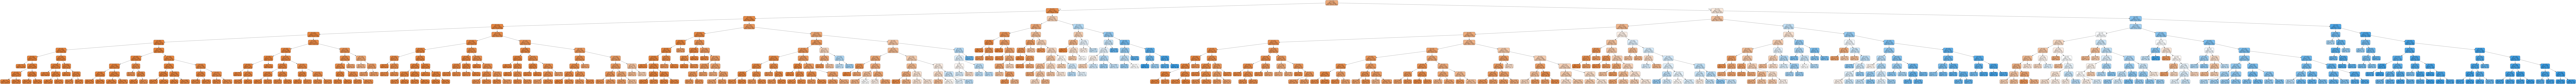

In [79]:
#use pydotplus package to create a visualization of the decision tree 

#export_graphviz --> generates a GraphViz representation of the decision tree, written into out_file 

dot_data = StringIO() # Using the StringIO method to set as file object
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True, # rounded=True -->draw node boxes with rounded corners & Helvetica fonts instead of Times-Roman
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.write_png('DecisionTree.png')
Image(graph.create_png())


#Source: 
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html 

#**6.Evaluate Decision Tree Performance**

In [ ]:
# calculating accuracy score of target prediction
print(metrics.accuracy_score(y_test, y_pred))

#0.84 

0.8441741907745225


In [ ]:
# printing confusion matrix (TP,TN,FP,FN...) -- Tabulation of actual vs. predicted 
print(metrics.confusion_matrix(y_test, y_pred))

# TP 11607
# TN 2137
# FN 828
# FP 1709


[[11607   828]
 [ 1709  2137]]


In [ ]:
#sklearn.metrics.recall_score

# target class that got correctly classified (true positive rate), catch the positives 

#Formula : TP/ TP + FN

print(metrics.recall_score(y_test, y_pred, average='macro'))
#0.74
print(metrics.recall_score(y_test, y_pred, average='micro'))
#0.84
print(metrics.recall_score(y_test, y_pred, average='weighted'))
#0.84
print(metrics.recall_score(y_test, y_pred, average=None))
# [0.93341375 0.55564223]

In [ ]:
# sklearn.metrics.precision_score

#Precision: positive decisions you made (PPV positive predicive value),how many times positive total 

print(metrics.precision_score(y_test, y_pred, average='macro'))
#0.796
print(metrics.precision_score(y_test, y_pred, average='micro'))
#0.84
print(metrics.precision_score(y_test, y_pred, average='weighted'))
#0.83
print(metrics.precision_score(y_test, y_pred, average=None))
# [0.87165816 0.72074199]


In [ ]:
# sklearn.metrics.f1_score

#F-1 how balanced predicting pos and negative 

print(metrics.f1_score(y_test, y_pred, average='macro'))
#0.76
print(metrics.f1_score(y_test, y_pred, average='micro'))
#0.84
print(metrics.f1_score(y_test, y_pred, average='weighted'))
#0.83
print(metrics.f1_score(y_test, y_pred, average=None))
# [0.90147955 0.62751432]

In [ ]:
#Computing Area Under the Receiver Operating Characteristic (ROC) Curve

print(metrics.roc_auc_score(y_test, y_pred, average='macro'))
#0.74

0.7445279885984343


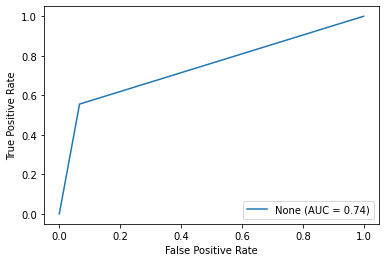

In [ ]:
#Plot Receiver operating characteristic (ROC) curve

sklearn.metrics.plot_roc_curve

#fpr = false positive rate 
#tpr = true positive rate 

# https://scikit-learn.org/ documentation 

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=None)                             
display.plot()  


#**7. Tune Decision Tree Performance**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#Hyperparameters: 


    #• Split Criteria – ‘Entropy’ or ‘Gini Impurity’ --> # Gini impurity and “entropy” for the information gain
    #• Minimum Sample Split – Minimum number of records required in any node for a further split to be attempted
    #• Minimum Sample Leaf – Minimum of samples in a leaf node to stop further splitting (becomes a leaf node)
    #• Maximum Depth – Maximum depth of the tree allowed


#reduce complexity and size of the trees

# This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

In [196]:

dtree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=1,max_depth=8,random_state=101,max_features=None,criterion="entropy")

%time dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)


#Performance Metrics: 

#1.Accuracy 
print(metrics.accuracy_score(y_test, y_pred))

#2.Recall 
print(metrics.recall_score(y_test, y_pred, average='weighted'))

#Precision 
print(metrics.precision_score(y_test, y_pred, average='weighted'))

#F1 Score 
print(metrics.f1_score(y_test, y_pred, average='weighted'))

CPU times: user 29 ms, sys: 904 µs, total: 29.9 ms
Wall time: 30 ms
0.8465696210306493
0.8465696210306493
0.8391475253712896
0.8403585284201329


#**8. Conclusion** 

Q.8.1 How long was your total run time to train the model?

Q.8.2 Did you find the BEST TREE?

Q.8.3 Draw the Graph of the BEST TREE Using GraphViz

Q.8.4 What makes it the best tree?


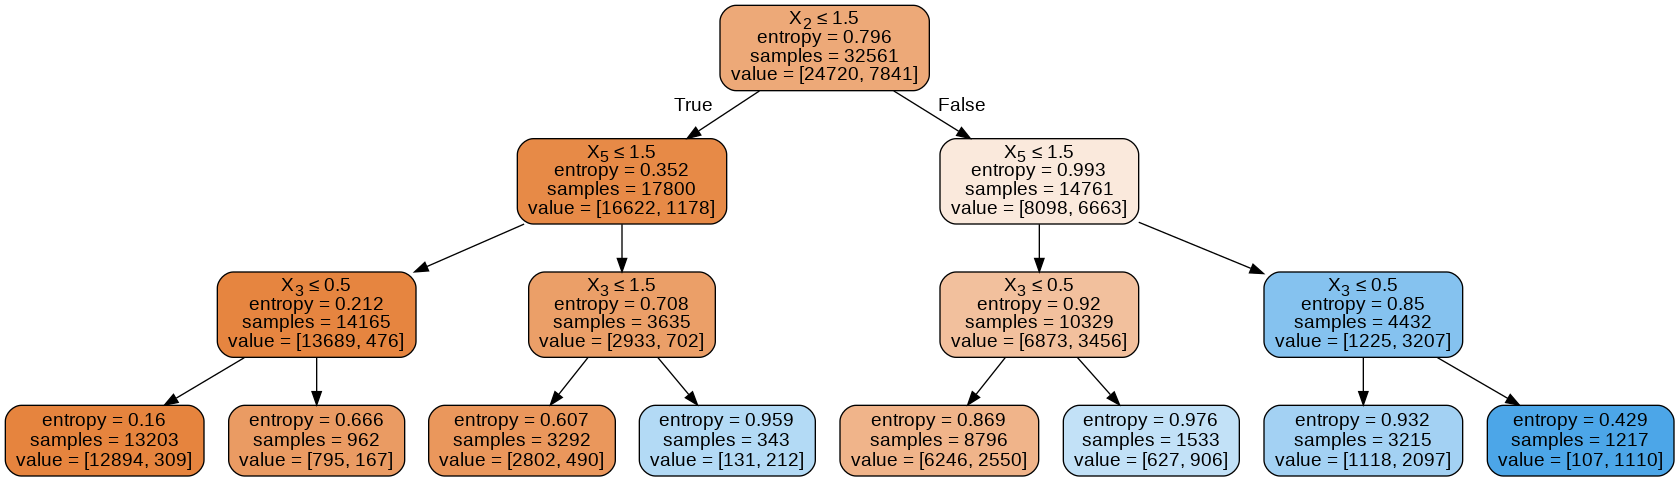

In [197]:
dtree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=1,max_depth=3,random_state=101,max_features=None,criterion="entropy")

dtree.fit(X_train, y_train) #train the model

dot_data = StringIO() # Using the StringIO method to set as file object
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True, # rounded=True -->draw node boxes with rounded corners & Helvetica fonts instead of Times-Roman
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.write_png('DecisionTree.png')
Image(graph.create_png())

#**9. Automation of Performance**

#**10. Prediction using your "trained" Decision Tree Model**

• Hours Worked per Week = 48

• Occupation Category = Mid - Low

• Marriage Status & Relationships = High

• Capital Gain = Yes

• Race-Sex Group = Mid

• Number of Years of Education = 12

• Education Category = High

• Work Class = Income

• Age = 58




**Q.10.1 What is the probability that your prediction for this person is accurate?**

In [ ]:
#make sure order is correct 

cols = ['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','workclass_bin','age_bin']

new_person_data = [['d. 41-50 & 61-70','b. Mid - Low','c. High','c. > 0','b. Mid','e. High','b. income','d. 36-40 & 56-60']]

#create DF with new information 
new_person = pd.DataFrame(data= new_person_data, columns = cols, dtype= 'category')

new_person

#instantiate LabelEncoder
label_en = preprocessing.LabelEncoder()

new_person[cols] = new_person[cols].apply(label_en.fit_transform)



#Model 
dtree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=1,max_depth=8,random_state=101,max_features=None,criterion="entropy")

dtree.fit(X_train, y_train) #train the model

#predict 
y_pred = dtree.predict(new_person)

print(metrics.accuracy_score(y_test, y_pred))

#Output 

# array([0])

#Q.10.1 What is the probability that your prediction for this person is accurate?

# 0.8441741907745225

# 84% accurate 

# Anything better than 80% considered good
